[View in Colaboratory](https://colab.research.google.com/github/Hamahmi/machine-learning/blob/master/MNIST.ipynb)

## Using Neural Network to classify MNIST Dataset

### Introduction

In this tutorial we will use [Deep Neural Networks](https://en.wikipedia.org/wiki/Deep_learning) to classify hand digit characters in the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

We will use a higher level library called [keras](https://keras.io/backend/) with tensorflow as the backend.

### Importing All Libraries

I prefere that all importings to be first but ofcourse you can import anywhere (This is Python, not as restrected as java :D )

In [1]:
# Import libraries necessary for this project

import numpy as np

from keras.datasets       import mnist
from keras.utils.np_utils import to_categorical
from keras.models         import Sequential
from keras.layers         import Dense
from keras.layers         import Dropout
from matplotlib.pyplot    import imshow
from PIL                  import Image
from random               import randint


print("\nImporting ✓\n")

Using TensorFlow backend.



Importing ✓



### Loading the Data
We will load the data into x_train, y_train and x_test, y_test, in the next section we will get information about the data.

In [2]:
# Load the Iris dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("\nLoading ✓\n")


Loading ✓



### Exploring the data
This step is a very important step, sice we need to know the characteristics of the data to choose later the algorithm with which we can classify the data and which accuracy metric you are going to use. We will know the shape the data is saved with and the classes we have.

In the 2nd part of the code we will get a point from the training set and print an image of it along with the class to get an idea of the data points.

There are 60000 training examples.
And 10000 testing examples.
The images are with dimensions : 28 x 28

The classes we have are : [0 1 2 3 4 5 6 7 8 9]

The class you got is 2

Exploring ✓



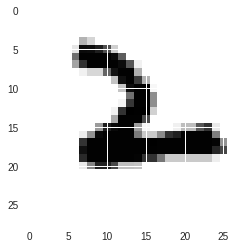

In [3]:
print("There are", x_train.shape[0] , "training examples.")
print("And",  x_test.shape[0], "testing examples.")
print("The images are with dimensions :", x_train.shape[1] ,"x", x_train.shape[2])
print("\nThe classes we have are :",np.unique(y_train))

%matplotlib inline
# everytime you run you'll get another data point 
random = randint(0, 60000)
print ("\nThe class you got is",y_train[random])
imshow(x_train[random])
print("\nExploring ✓\n")

One can see that the dataset consists of 60,000 training example each is a 2D array as an image of dimention 28 * 28. One can also see that we have 10 classes which represent the digits from 0 to 9 crossponding to the data.

### Reshaping the Data to fit the Model

Since we are deciding to make a sequential model the data needs to be reshaped to fit as following :
-  Reshaping the input data from 2D array with dimension of 28x28 to a 1D vector with a size of 784 in order to pass it to the Deep Neural Network.
- Normalizing the input data that ranges from 0 to 255 to range from 0 to 1 by deviding it by 255.
- Using to_categorial to split the output into 10 distinct  class labels so that we can use the [Softmax function](https://en.wikipedia.org/wiki/Softmax_function) as out multicalss classifier in the next section.

In [4]:
# Rehaping the data from 2D array with size 28x28 to 1D array (vector) with size 784
x_train = x_train.reshape(x_train.shape[0], -1)
x_test  =  x_test.reshape(x_test.shape[0], -1)

#  Normalizing the data to be in range from 0 to 1 instead of 0 to 255 
x_train = x_train / 255
x_test  = x_test  / 255
print (x_train.shape)
print ( x_test.shape)

# Splitting the output to 10 distinct calsses
y_train = to_categorical(y_train,num_classes = 10)
y_test  = to_categorical( y_test,num_classes = 10)
print(y_train.shape)
print( y_test.shape)

print("\nReshaping ✓\n")

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)

Reshaping ✓



### Selectin the Model

The model is a [sequential model](https://keras.io/models/sequential/) with 1 hidden layar (_ofcourse you can use more than 1 hidden layar, in fact just uncomment the line after TODO and rerun all the following codes again and see the difference yourself_) with 1024 neurons, ReLU and an output layar with 10 neurons, Softmax as out multiclass classifier as explained above.

In [5]:
model = Sequential()

# Hidden layer
model.add(Dense(units=1024, activation='relu', input_shape=(784,)))

# TODO 
# Add another hidden layar(s) as below and rerun all the following codes to observe
# model.add(Dense(units=1024, activation='relu' ))
# model.add(Dense(units=512 , activation='relu' ))

# Output layer
model.add(Dense(units=10, activation='softmax'))

# compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\nCompiling ✓\n")


Compiling ✓



### Training the Model

In this section we will train the Network on the data we have with 30 epochs and 60% of the data as training set, 20% as validation and the remaining 20% as a test set that we will evaluate the model on in the next section.

In [6]:
model.fit(x_train, y_train, epochs=30, batch_size=200, validation_split=0.2, verbose=2)
print("\nTraining ✓\n")

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
 - 6s - loss: 0.2964 - acc: 0.9168 - val_loss: 0.1449 - val_acc: 0.9603
Epoch 2/30
 - 6s - loss: 0.1195 - acc: 0.9653 - val_loss: 0.1121 - val_acc: 0.9658
Epoch 3/30
 - 6s - loss: 0.0761 - acc: 0.9780 - val_loss: 0.0958 - val_acc: 0.9716
Epoch 4/30
 - 6s - loss: 0.0532 - acc: 0.9850 - val_loss: 0.0847 - val_acc: 0.9753
Epoch 5/30
 - 6s - loss: 0.0377 - acc: 0.9893 - val_loss: 0.0762 - val_acc: 0.9780
Epoch 6/30
 - 5s - loss: 0.0277 - acc: 0.9928 - val_loss: 0.0817 - val_acc: 0.9761
Epoch 7/30
 - 6s - loss: 0.0201 - acc: 0.9949 - val_loss: 0.0798 - val_acc: 0.9772
Epoch 8/30
 - 5s - loss: 0.0141 - acc: 0.9970 - val_loss: 0.0725 - val_acc: 0.9799
Epoch 9/30
 - 5s - loss: 0.0111 - acc: 0.9977 - val_loss: 0.0718 - val_acc: 0.9796
Epoch 10/30
 - 5s - loss: 0.0072 - acc: 0.9990 - val_loss: 0.0709 - val_acc: 0.9808
Epoch 11/30
 - 6s - loss: 0.0051 - acc: 0.9994 - val_loss: 0.0834 - val_acc: 0.9774
Epoch 12/30
 - 6s - loss: 0.0038 - 

### Results to evaluate the model

Now we will evaluate the model we have on the test set to see the accuracy we get.

In [7]:
(error, accuracy) = model.evaluate(x_test, y_test)
print( "test error = ", error)
print("accuracy = ", accuracy*100, "%")

10000/10000 [==============================] - 1s 82us/step
test error =  0.07381055212803463
accuracy =  98.29 %


*End of the Project :)*

[Drive](https://colab.research.google.com/drive/1CaoOf0YDyWBvkRGSHfUxM4bHuO2t4o5x#scrollTo=Ybenv8OlvPO9)

In [8]:
print("\nPROJECT ✓\n")


PROJECT ✓

